<a href="https://colab.research.google.com/github/AkshitChugh787/Risk-Factors-of-Light-Pollution-/blob/main/notebooks/Bird_FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 179 kB 14.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639824 sha256=52d0fcaa296ca27893deabafa680208f8654c25776adbe784a83e61e7d54846e
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving guillemots.csv to guillemots.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['guillemots.csv']))

In [ ]:
df

,Unnamed: 0,lat,lon,alt,unix,bird,species,year,date_time,max_depth.m,colony2,coverage_ratio,is_dive,is_dive_1m,is_dive_2m,is_dive_4m,is_dive_5m,is_dive_0m
0,1,56.095451,-6.233089,-23.059999,1340627854,1,tCOGU,t2012,2012-06-25 13:37:34,-2.172046,1,0.5,0,0,0,0,0,0
1,2,56.095408,-6.233520,-2.983077,1340627954,1,tCOGU,t2012,2012-06-25 13:39:14,-1.152306,1,0.6,0,0,0,0,0,0
2,3,56.095437,-6.234275,3.470286,1340628054,1,tCOGU,t2012,2012-06-25 13:40:54,-2.172046,1,0.7,0,0,0,0,0,0
3,4,56.095635,-6.234815,1.902667,1340628154,1,tCOGU,t2012,2012-06-25 13:42:34,-2.172046,1,0.8,0,0,0,0,0,0
4,5,56.095821,-6.235293,2.824952,1340628254,1,tCOGU,t2012,2012-06-25 13:44:14,-2.172046,1,0.9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63920,263714,57.380016,-1.876185,38.550566,1339500344,108,tCOGU,t2012,2012-06-12 12:25:44,-1.152306,10,NaN,0,0,0,0,0,0
63921,263715,57.380147,-1.876534,32.490545,1339500444,108,tCOGU,t2012,2012-06-12 12:27:24,-1.152306,10,NaN,0,0,0,0,0,0
63922,263716,57.380095,-1.876400,38.292069,1339500544,108,tCOGU,t2012,2012-06-12 12:29:04,1.906914,10,NaN,0,1,0,0,0,1
63923,263717,57.380045,-1.876275,38.851776,1339500644,108,tCOGU,t2012,2012-06-12 12:30:44,-2.172046,10,NaN,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = df.bird

In [ ]:
x.value_counts()

18     3844
17     3457
15     3292
49     3174
1      2867
37     2643
48     2627
27     2623
24     2555
23     2394
34     2315
71     2252
53     2081
55     2055
33     1879
56     1864
8      1845
70     1832
32     1820
9      1766
106    1709
16     1683
108    1650
107    1637
105    1510
54     1305
52     1242
50     1229
51     1220
45     1049
5       506
Name: bird, dtype: int64

In [ ]:
df_18 = df.loc[df['bird'] == 18]

In [ ]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 15416 to 19259
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3844 non-null   int64  
 1   lat             3844 non-null   float64
 2   lon             3844 non-null   float64
 3   alt             3844 non-null   float64
 4   unix            3844 non-null   int64  
 5   bird            3844 non-null   int64  
 6   species         3844 non-null   object 
 7   year            3844 non-null   object 
 8   date_time       3844 non-null   object 
 9   max_depth.m     3844 non-null   float64
 10  colony2         3844 non-null   int64  
 11  coverage_ratio  3834 non-null   float64
 12  is_dive         3844 non-null   int64  
 13  is_dive_1m      3844 non-null   int64  
 14  is_dive_2m      3844 non-null   int64  
 15  is_dive_4m      3844 non-null   int64  
 16  is_dive_5m      3844 non-null   int64  
 17  is_dive_0m      3844 non-nul

In [ ]:
df_18.describe()

,Unnamed: 0,lat,lon,alt,unix,bird,max_depth.m,colony2,coverage_ratio,is_dive,is_dive_1m,is_dive_2m,is_dive_4m,is_dive_5m,is_dive_0m
count,3844.000000,3844.000000,3844.000000,3844.000000,3.844000e+03,3844.0,3844.000000,3844.0,3834.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000
mean,32581.500000,56.109897,-6.148298,21.013731,1.371586e+09,18.0,0.964105,1.0,0.792149,0.173777,0.201873,0.182362,0.163892,0.155047,0.229969
std,1109.811546,0.203153,0.245012,68.436915,1.109812e+05,0.0,8.420429,0.0,0.163523,0.378967,0.401450,0.386193,0.370226,0.361996,0.420867
min,30660.000000,55.775962,-6.490535,-315.369394,1.371394e+09,18.0,-6.760876,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31620.750000,56.025741,-6.241461,0.865611,1.371490e+09,18.0,-2.426981,1.0,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32581.500000,56.088189,-6.238912,9.831250,1.371586e+09,18.0,-1.662176,1.0,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33542.250000,56.165507,-5.841155,32.037544,1.371683e+09,18.0,-0.642436,1.0,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34503.000000,56.451627,-5.650268,788.209412,1.371779e+09,18.0,69.209754,1.0,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
altitude = df_18[['date_time','alt']]

In [ ]:
altitude

,date_time,alt
15416,2013-06-16 15:51:35,-0.040000
15417,2013-06-16 15:53:15,5.118249
15418,2013-06-16 15:54:55,10.276498
15419,2013-06-16 15:56:35,14.421284
15420,2013-06-16 15:58:15,-14.202569
...,...,...
19255,2013-06-21 02:29:55,28.463091
19256,2013-06-21 02:31:35,32.758899
19257,2013-06-21 02:33:15,43.195833
19258,2013-06-21 02:34:55,39.349083


In [ ]:
altitude.date_time = pd.to_datetime(altitude.date_time)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
altitude.head()

,date_time,alt
15416,2013-06-16 15:51:35,-0.040000
15417,2013-06-16 15:53:15,5.118249
15418,2013-06-16 15:54:55,10.276498
15419,2013-06-16 15:56:35,14.421284
15420,2013-06-16 15:58:15,-14.202569


In [ ]:
altitude.set_index("date_time", inplace = True)

In [ ]:
altitude.head()

,alt
date_time,
2013-06-16 15:51:35,-0.040000
2013-06-16 15:53:15,5.118249
2013-06-16 15:54:55,10.276498
2013-06-16 15:56:35,14.421284
2013-06-16 15:58:15,-14.202569


In [ ]:
altitude_h = altitude.resample('h').mean()

In [ ]:
altitude_s = altitude.resample('100S').mean()

In [ ]:
altitude_s

,alt
date_time,
2013-06-16 15:50:00,-0.040000
2013-06-16 15:51:40,5.118249
2013-06-16 15:53:20,10.276498
2013-06-16 15:55:00,14.421284
2013-06-16 15:56:40,-14.202569
...,...
2013-06-21 02:28:20,28.463091
2013-06-21 02:30:00,32.758899
2013-06-21 02:31:40,43.195833


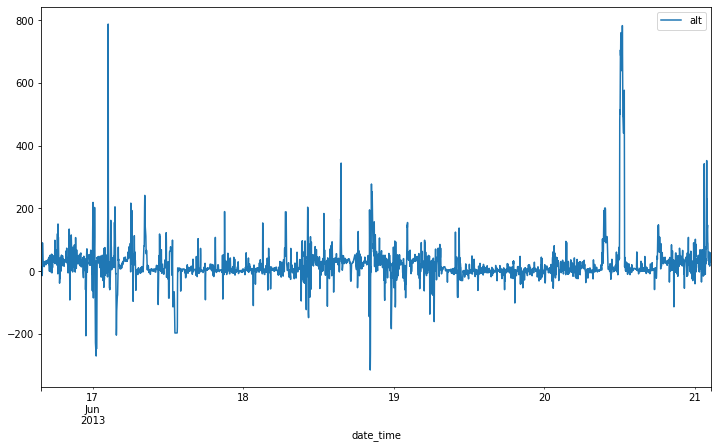

In [ ]:
altitude_s.plot(figsize=(12,7))
plt.show()

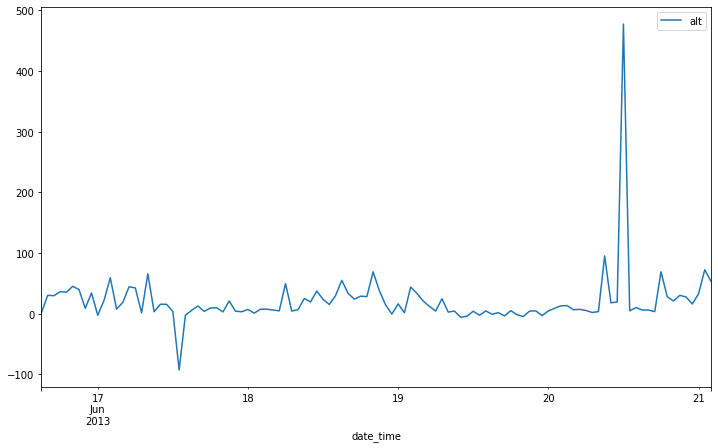

In [ ]:
altitude_h.plot(figsize=(12,7))
plt.show()

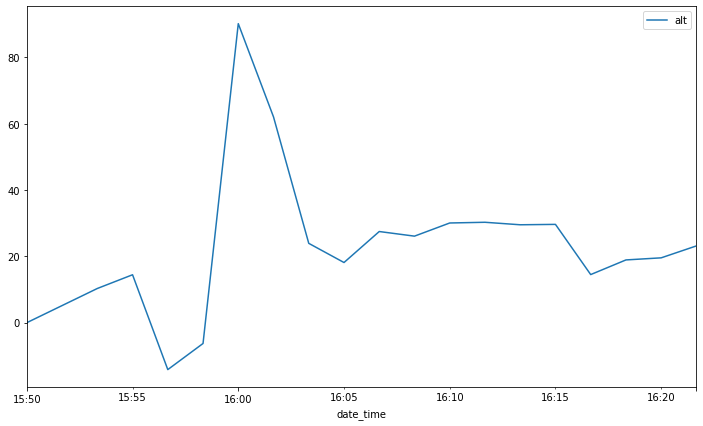

In [ ]:
altitude_s[:20].plot(figsize=(12,7))
plt.show()

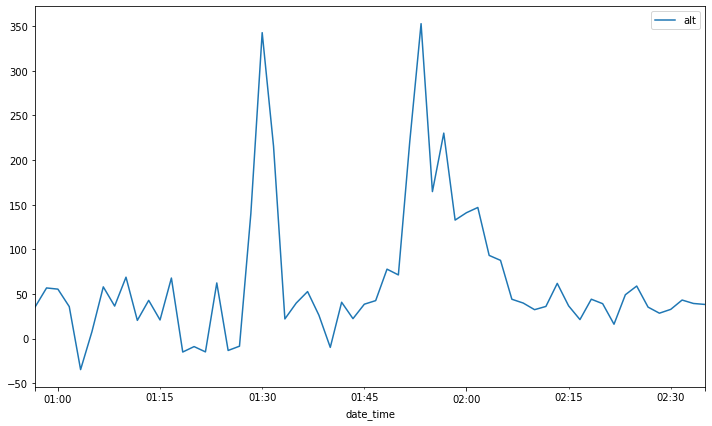

In [ ]:
altitude_s[-60:].plot(figsize=(12,7))
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

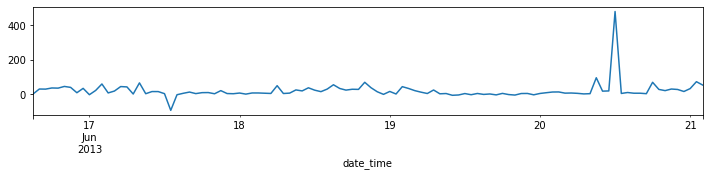

In [ ]:
results = seasonal_decompose(altitude_h['alt'])
results.observed.plot(figsize=(12,2))

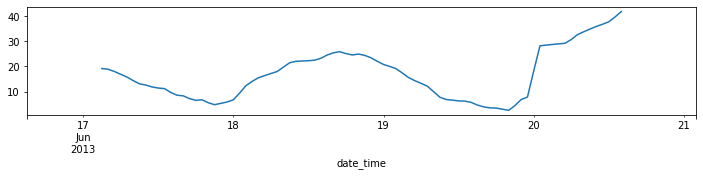

In [ ]:
results.trend.plot(figsize=(12,2))

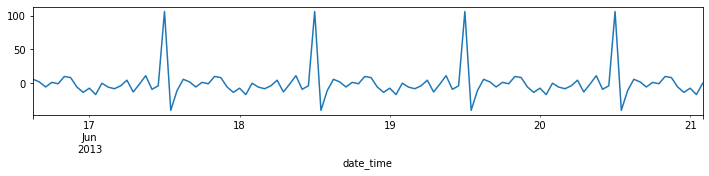

In [ ]:
results.seasonal.plot(figsize=(12,2))

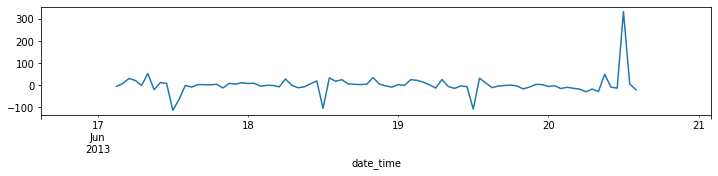

In [ ]:
results.resid.plot(figsize=(12,2))

In [ ]:
m = Prophet()

In [ ]:
m.fit(df_18)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
df_18 = df_18[['date_time','alt']]

In [ ]:
df_18.columns = ['ds','y']

In [ ]:
df_18.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
future = m.make_future_dataframe(periods=300, freq='100S')

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4139,2013-06-21 10:49:55,96.941209,13.659212,175.387526
4140,2013-06-21 10:51:35,97.313994,8.538847,184.182886
4141,2013-06-21 10:53:15,97.682013,17.572466,180.894575
4142,2013-06-21 10:54:55,98.045074,11.224536,180.949128
4143,2013-06-21 10:56:35,98.402987,15.963957,177.766704


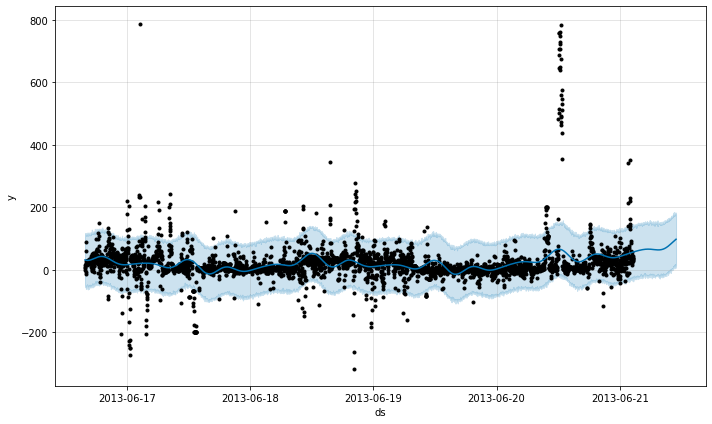

In [ ]:
fig1 = m.plot(forecast)


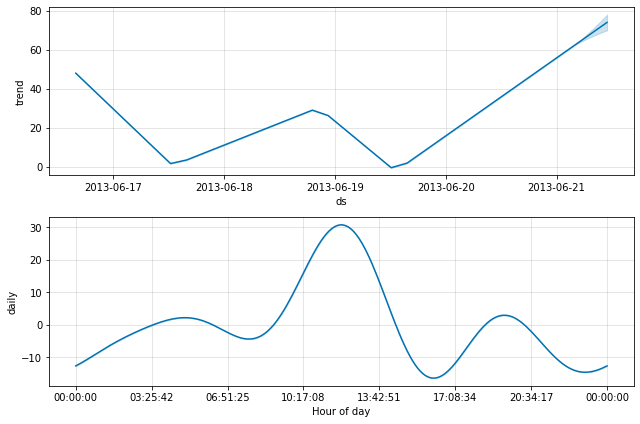

In [ ]:
fig2 = m.plot_components(forecast)
